Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names: ['malignant' 'benign']

Decision Tree Accuracy: 0.9508771929824561 or 95.09%

Decision Tree Confusion Matrix:
 [[ 91   7]
 [  7 180]]
Decision Tree Confusion Matrix Visual:


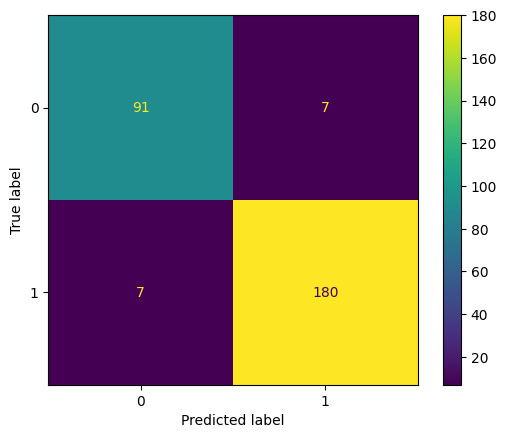

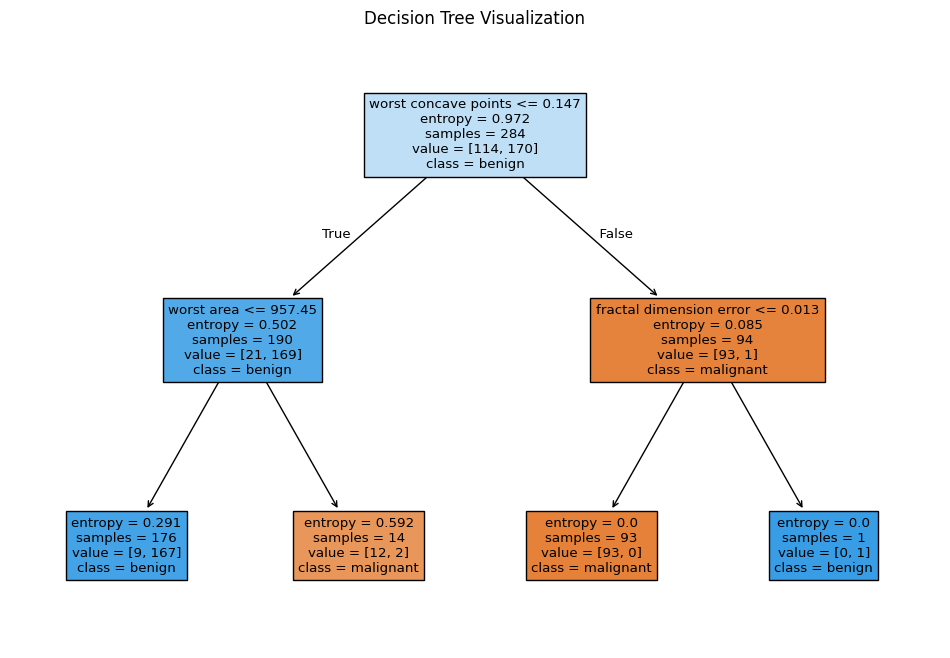

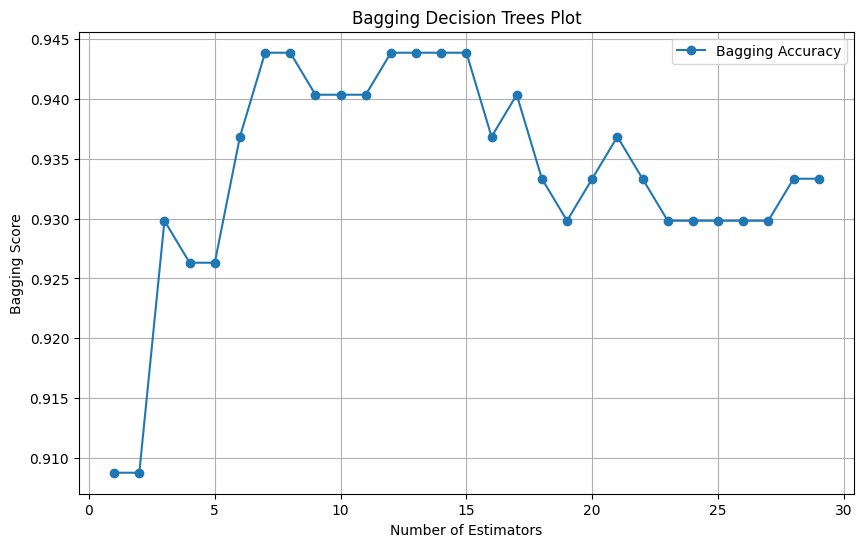

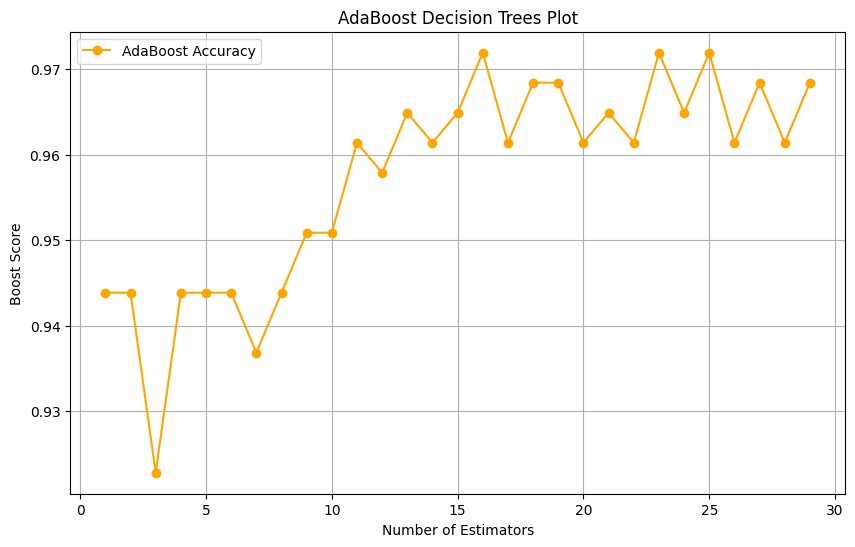

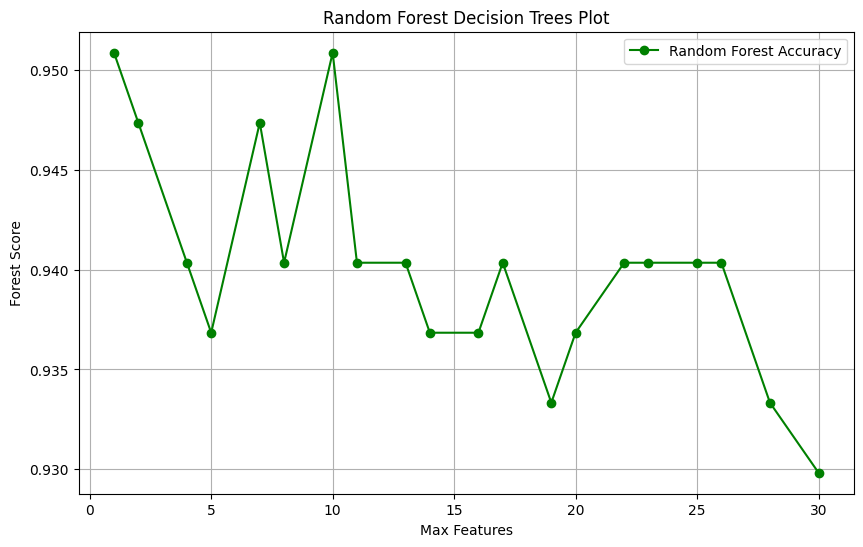

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np


class ClassifierEvaluator:
    """A class to evaluate the performance of different classification algorithms
    on the Breast Cancer dataset using Decision Trees, Bagging, AdaBoost, and Random Forest.

    Attributes:
        data: The breast cancer dataset loaded from sklearn.
        X: Feature matrix.
        y: Target vector.
        feature_names: Names of the features.
        target_names: Names of the target classes.
        X_train: Training feature matrix.
        X_test: Testing feature matrix.
        y_train: Training target vector.
        y_test: Testing target vector.
        n_estimators_range: Range of number of estimators for ensemble methods.
        max_depth: The max depth of the trees. Defaults to 2
    """
    def __init__(self, random_state = 42):
        # Random State is 42 in documentation for skitlibrary, but I want to be able to change the init if needed for different graph results
        # See: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html
        # Also see: Hitchiker's Guide to the Galaxy
        # Load data set and split into train and test sets
        self.data = load_breast_cancer()
        self.X, self.y = self.data.data, self.data.target
        self.feature_names = self.data.feature_names
        self.target_names = self.data.target_names
        self.random_state = random_state
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.5, random_state=self.random_state
        )
        self.n_estimators_range = range(1, 30)
        self.max_depth = 2

    def print_feat_targ(self) -> None:
        """Prints feature names and target names"""
        print(f"Feature Names: {self.feature_names}\n")
        print(f"Target Names: {self.target_names}\n")

    def decision_tree(self) -> None:
        """Trains and evaluates a Decision Tree classifier.

        Args:
            self
        """
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=self.max_depth, random_state=self.random_state)
        dt.fit(self.X_train, self.y_train)
        y_pred_dt = dt.predict(self.X_test)

        # Calculate and display accuracy and confusion matrix
        dt_accuracy = accuracy_score(self.y_test, y_pred_dt)
        dt_confusion = confusion_matrix(self.y_test, y_pred_dt)
        print(f"Decision Tree Accuracy: {dt_accuracy} or {dt_accuracy *100:.2f}%\n")
        print(f"Decision Tree Confusion Matrix:\n {dt_confusion}\nDecision Tree Confusion Matrix Visual:")

        # A pretty confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix= dt_confusion) 
        disp.plot()

        # Plot the Decision Tree
        plt.figure(figsize=(12, 8))
        plot_tree(dt, feature_names=self.feature_names, class_names=self.target_names, filled=True)
        plt.title("Decision Tree Visualization")
        plt.show()

    def bagging(self) -> None:
        """Evaluates Bagging ensemble of Decision Trees.

        Args:
            self
        """
        scores = []

        for n_estimators in self.n_estimators_range:
            # Bagging classifier creation and train
            bagging = BaggingClassifier(
                estimator=DecisionTreeClassifier(criterion="entropy", max_depth=self.max_depth),
                n_estimators=n_estimators,
                random_state=self.random_state,
            )
            bagging.fit(self.X_train, self.y_train)
            y_pred = bagging.predict(self.X_test)
            
            # Stores accuracy for n_estimators
            scores.append(accuracy_score(self.y_test, y_pred))
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(self.n_estimators_range, scores, marker="o", label="Bagging Accuracy")
        plt.xlabel("Number of Estimators")
        plt.ylabel("Bagging Score")
        plt.title("Bagging Decision Trees Plot")
        plt.legend()
        plt.grid()
        plt.show()

    def ada_boost(self) -> None:
        """
        Evaluates AdaBoost ensemble of Decision Trees.

        Args:
           self
        """
        scores = []

        for n_estimators in self.n_estimators_range:
            # Adaboost classifier creation and trianing
            adaboost = AdaBoostClassifier(
                estimator=DecisionTreeClassifier(criterion="entropy", max_depth=self.max_depth),
                n_estimators=n_estimators,
                random_state=self.random_state,
                algorithm = "SAMME" # This was giving me a warning, avoiding it
            )
            adaboost.fit(self.X_train, self.y_train)
            y_pred = adaboost.predict(self.X_test)
            # Store accuracy
            scores.append(accuracy_score(self.y_test, y_pred))

        # Plotting it
        plt.figure(figsize=(10, 6))
        plt.plot(self.n_estimators_range, scores, marker="o", label="AdaBoost Accuracy", color="orange")
        plt.xlabel("Number of Estimators")
        plt.ylabel("Boost Score")
        plt.title("AdaBoost Decision Trees Plot")
        plt.legend()
        plt.grid()
        plt.show()

    def random_forest(self)-> None: 
        """Evaluates Random Forest with varying maximum features.

        Args:
           self
        """
        max_features_range = np.linspace(1, self.X.shape[1], 20, dtype=int)
        scores = []

        for max_features in max_features_range:
            random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=self.random_state, max_depth =self.max_depth)
            random_forest.fit(self.X_train, self.y_train)
            y_pred = random_forest.predict(self.X_test)
            scores.append(accuracy_score(self.y_test, y_pred))

        plt.figure(figsize=(10, 6))
        plt.plot(max_features_range, scores, marker="o", label="Random Forest Accuracy", color="green")
        plt.xlabel("Max Features")
        plt.ylabel("Forest Score")
        plt.title("Random Forest Decision Trees Plot")
        plt.legend()
        plt.grid()
        plt.show()

    def evaluate(self) -> None:
        """Helper function to run all the evaluators. I didn't want to run them all from main
        """
        self.print_feat_targ()
        self.decision_tree()
        self.bagging()
        self.ada_boost()
        self.random_forest()

if __name__ == "__main__":
    evaluator = ClassifierEvaluator()
    evaluator.evaluate()